<a href="https://colab.research.google.com/github/funpi89/colab_tensorflow2.0/blob/master/Image_classification_API_with_Tensorflow_Server_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dependencies and notebook gpu setup

In [0]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  37253      0 --:--:-- --:--:-- --:--:-- 37253
OK


In [0]:
!sudo apt-get update & sudo apt-get install tensorflow-model-server

Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:10 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 Packages [357 B]
Get:11 https://developer.download.nvidia.com/c

In [0]:
!sudo apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 145 not upgraded.
Need to get 151 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 1.14.0 [151 MB]
Fetched 151 MB in 2s (65.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tensorfl

In [0]:
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 70kB/s 
     |████████████████████████████████| 3.2MB 36.3MB/s 
     |████████████████████████████████| 368kB 33.8MB/s 
ERROR: tensorflow 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0


In [0]:
!pip install requests

# Import project dependencies

In [0]:
import os
import json
import random
import requests
import subprocess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot  as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'1.14.0'

# Dataset preprocessing

In [0]:
# loading dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
# image normolization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
type(X_train)

numpy.ndarray

# Defining the model

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 10s 198us/sample - loss: 1.4743 - sparse_categorical_accuracy: 0.4671
Epoch 2/10
50000/50000 [==============================] - 10s 191us/sample - loss: 1.0137 - sparse_categorical_accuracy: 0.6446
Epoch 3/10
50000/50000 [==============================] - 10s 193us/sample - loss: 0.8241 - sparse_categorical_accuracy: 0.7141
Epoch 4/10
50000/50000 [==============================] - 10s 195us/sample - loss: 0.7028 - sparse_categorical_accuracy: 0.7554
Epoch 5/10
50000/50000 [==============================] - 10s 194us/sample - loss: 0.6106 - sparse_categorical_accuracy: 0.7877
Epoch 6/10
50000/50000 [==============================] - 10s 194us/sample - loss: 0.5276 - sparse_categorical_accuracy: 0.8159
Epoch 7/10
50000/50000 [==============================] - 10s 197us/sample - loss: 0.4455 - sparse_categorical_accuracy: 0.8438
Epoch 8/10
50000/50000 [==============================] - 10s 194us/sample - loss: 0.3673 - sparse_categ

In [0]:
# model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 140us/sample - loss: 1.0179 - sparse_categorical_accuracy: 0.7366


In [0]:
print("Test accuracy : {}".format(test_accuracy))

Test accuracy : 0.7365999817848206


# Saving the model for production

In [0]:
# creating the diectory for the model
MODEL_DIR = "model/"
version = 1

In [0]:
export_path = os.path.join(MODEL_DIR, str(version))
export_path

'model/1'

In [0]:
if os.path.isdir(export_path):
  !rm -r {export_path}

In [0]:
# Saving the model for tenserflow serving
tf.saved_model.simple_save(tf.keras.backend.get_session(), export_dir=export_path, inputs={"input_image":model.input}, outputs={t.name:t for t in model.outputs})

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: model/1/saved_model.pb


# Setting up the production environment

In [0]:
# exproting the MODEL_DIR to environment variables
os.environ['MODEL_DIR'] = os.path.abspath(MODEL_DIR)

In [0]:
# running the tensorflow serving REST API
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8501 --model_name=cifar10 --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [0]:
!tail server.log

2019-10-07 13:28:17.027446: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:54] Reading meta graph with tags { serve }
2019-10-07 13:28:17.031145: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-10-07 13:28:17.053072: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:202] Restoring SavedModel bundle.
2019-10-07 13:28:17.111263: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:311] SavedModel load for tags { serve }; Status: success. Took 88309 microseconds.
2019-10-07 13:28:17.111346: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:103] No warmup data file found at /content/model/1/assets.extra/tf_serving_warmup_requests
2019-10-07 13:28:17.111439: I tensorflow_serving/core/loader_harness.cc:86] Successfully loaded servable version {name: cifar10 version: 1}
2019-10-07 13:28:17.112680: I tensorflow_serving/

# Creating the first POST request

In [0]:
random_image = np.random.np.random.randint(0, len(X_test))
random_image

8195

In [0]:
# creating  the json data object
data = json.dumps({"signature_name":"serving_default","instances":[X_test[random_image].tolist()]})

In [0]:
data

'{"signature_name": "serving_default", "instances": [[[[0.5098039215686274, 0.7607843137254902, 0.9921568627450981], [0.5137254901960784, 0.7647058823529411, 0.9882352941176471], [0.5215686274509804, 0.7764705882352941, 0.9882352941176471], [0.5294117647058824, 0.7843137254901961, 0.984313725490196], [0.5450980392156862, 0.7843137254901961, 0.9882352941176471], [0.5607843137254902, 0.788235294117647, 0.9686274509803922], [0.5568627450980392, 0.803921568627451, 0.9607843137254902], [0.5450980392156862, 0.796078431372549, 0.9882352941176471], [0.5411764705882353, 0.8, 0.9882352941176471], [0.5490196078431373, 0.8117647058823529, 0.9647058823529412], [0.5529411764705883, 0.8117647058823529, 0.9764705882352941], [0.5568627450980392, 0.807843137254902, 0.984313725490196], [0.5647058823529412, 0.807843137254902, 0.984313725490196], [0.5764705882352941, 0.807843137254902, 0.9882352941176471], [0.5843137254901961, 0.8, 0.9882352941176471], [0.5764705882352941, 0.8117647058823529, 0.98823529411

In [0]:
# sending the first POST request to the model
headers = {"content-type":"application/json"}

In [0]:
json_response = requests.post(url="http://localhost:8501/v1/models/cifar10:predict", data=data, headers=headers)

In [0]:
json_response

<Response [200]>

In [0]:
prediction = json.loads(json_response.text)['predictions']

In [0]:
prediction

[[1.63243429e-11,
  4.45823767e-10,
  2.09768281e-15,
  8.49974799e-17,
  5.07355879e-15,
  6.44170335e-15,
  2.98043755e-14,
  6.40285926e-19,
  1.0,
  7.24279848e-14]]

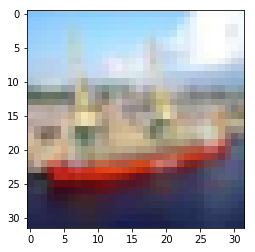

In [0]:
plt.imshow(X_test[random_image])

In [0]:
class_name[np.argmax(prediction[0])]

'ship'

In [0]:
!pip install pillow

In [0]:
from PIL import Image
im = Image.open('cattest.jpg')
im = im.resize((32,32))
im2arr = np.array(im).reshape(32,32,3)

data = json.dumps({"signature_name":"serving_default","instances":[im2arr.tolist()]})
headers = {"content-type":"application/json"}
json_response = requests.post(url="http://localhost:8501/v1/models/cifar10:predict", data=data, headers=headers)
json_response

<Response [200]>

In [0]:
prediction = json.loads(json_response.text)['predictions']
prediction

[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [0]:
class_name[np.argmax(prediction[0])]

'cat'

# Sending the POST request to a specific model

In [0]:
specific_json_response = requests.post(url="http://localhost:8501/v1/models/cifar10/versions/1:predict", data=data, headers=headers)

In [0]:
specific_json_response

<Response [200]>

## make new model

In [0]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(units=128, activation='relu'))
model2.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model2.fit(X_train, y_train, batch_size=128, epochs=10)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/10
50000/50000 [==============================] - 15s 299us/sample - loss: 1.5965 - sparse_categorical_accuracy: 0.4123
Epoch 2/10
50000/50000 [==============================] - 14s 284us/sample - loss: 1.1015 - sparse_categorical_accuracy: 0.6078
Epoch 3/10
50000/50000 [==============================] - 14s 284us/sample - loss: 0.8762 - sparse_categorical_accuracy: 0.6913
Epoch 4/10
50000/50000 [==============================] - 15s 294us/sample - loss: 0.7387 - sparse_categorical_accuracy: 0.7426
Epoch 5/10
50000/50000 [==============================] - 15s 297us/sample - loss: 0.6439 - sparse_categorical_accuracy: 0.7747
Epoch 6/10
50000/50000 [==============================] - 15s 296us/sample - loss: 0.5692 - sparse_categorical_accuracy: 0.8018
Epoch 7/10
50000/50000 [==============================] - 14s 285us/sample - loss: 0.5048 - sparse_categorical_accura

In [0]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 210us/sample - loss: 0.6464 - sparse_categorical_accuracy: 0.7911


In [0]:
print("Test accuracy : {}".format(test_accuracy))

Test accuracy : 0.791100025177002


In [0]:
export_path2 = os.path.join(MODEL_DIR, str(2))
export_path2

'model/2'

In [0]:
if os.path.isdir(export_path2):
  !rm -r {export_path2}

In [0]:
# Saving the model for tenserflow serving
tf.saved_model.simple_save(tf.keras.backend.get_session(), export_dir=export_path2, inputs={"input_image":model2.input}, outputs={t.name:t for t in model2.outputs})

INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: model/2/saved_model.pb


In [0]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8501 --model_name=cifar10 --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 2 in a separate thread.


In [0]:
!tail server.log

2019-10-06 07:37:32.433795: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:31] Reading SavedModel from: /content/model/2
2019-10-06 07:37:32.440816: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:54] Reading meta graph with tags { serve }
2019-10-06 07:37:32.448003: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-10-06 07:37:32.484147: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:202] Restoring SavedModel bundle.
2019-10-06 07:37:32.569857: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:311] SavedModel load for tags { serve }; Status: success. Took 136042 microseconds.
2019-10-06 07:37:32.569976: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:103] No warmup data file found at /content/model/2/assets.extra/tf_serving_warmup_requests
2019-10-06 07:37:32.570072: I tensorflow_serving/cor

In [0]:
v2_json_response = requests.post(url="http://localhost:8501/v1/models/cifar10/versions/2:predict", data=data, headers=headers)

In [0]:
v2_json_response

<Response [200]>

In [0]:
v1_json_response = requests.post(url="http://localhost:8501/v1/models/cifar10/versions/1:predict", data=data, headers=headers)
v1_json_response

<Response [404]>